# In this tutorial I am trying to understand how decision trees classifier works

For a graphical understanding of decision trees, watch this <a href="https://www.youtube.com/watch?v=7VeUPuFGJHk&ab_channel=StatQuestwithJoshStarmer">Youtube tutorial:</a>

In [1]:
# I will focus on the implementation using sklearn 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

I'll use a diabetes dataset downloaded from Kaggle: <a href="https://www.kaggle.com/uciml/pima-indians-diabetes-database">Data</a>



In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
# Let's have a look at the total records and columns, their types and if there exist any null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Data looks clean, with no null values and total 768 records

In [4]:
# Have a look at some samples, to get a feel how the data in each column looks like
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Let's rename the column names to make it easier to use in coding
data.columns = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


It's a binary class data, where each record is labelled either diabetic(1) or Not(0), presented by the Outcome column. The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [6]:
# Let's import decision tree classifier from SKlearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [7]:
# Let's prepare data as features and labels, before passing it onto the model
X = data.iloc[:,:-1] # features
y = data.iloc[:,-1:] # labels
print(X.head())
print(y.head())

   pregnant  glucose  bp  skin  insulin   bmi  pedigree  age
0         6      148  72    35        0  33.6     0.627   50
1         1       85  66    29        0  26.6     0.351   31
2         8      183  64     0        0  23.3     0.672   32
3         1       89  66    23       94  28.1     0.167   21
4         0      137  40    35      168  43.1     2.288   33
   label
0      1
1      0
2      1
3      0
4      1


In [8]:
# Split the data into train and test chunks, 70-30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [9]:
# Let's use all the columns to see how the Decision Tree classifier performs on raw data
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [10]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7142857142857143


In [11]:
conda update scikit-learn

Solving environment: ...working... 
  - defaults/noarch::sphinx-2.1.2-py_0, defaults/win-64::docutils-0.18.1-py37haa95532_2
  - defaults/noarch::sphinx-4.4.0-pyhd3eb1b0_0, defaults/win-64::docutils-0.17.1-py37haa95532_1done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

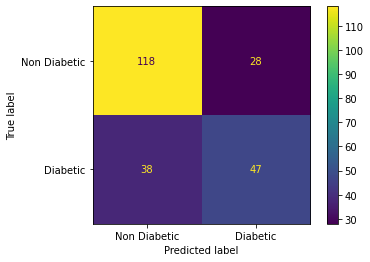

In [17]:
# let's plot the confusion matrix

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non Diabetic","Diabetic"])
disp.plot()
plt.show()

In [23]:
print(classification_report(y_test, y_pred, target_names=["Non Diabetic","Diabetic"]))

              precision    recall  f1-score   support

Non Diabetic       0.76      0.81      0.78       146
    Diabetic       0.63      0.55      0.59        85

    accuracy                           0.71       231
   macro avg       0.69      0.68      0.68       231
weighted avg       0.71      0.71      0.71       231



In [33]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [34]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [37]:
data.columns[:-1]

Index(['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree',
       'age'],
      dtype='object')

Will visualize the learning process in next sitting

In [36]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = data.columns[:-1],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('diabetes.png')
Image(graph.create_png())

InvocationException: GraphViz's executables not found